# The domain classification challenge from Haptik Open Datasets
##  Classify (short) user queries into one or more of the given nine classes.

In [17]:
import pandas as pd

from nltk.tokenize import TreebankWordTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Loading of Datasets for Training and Testing

In [18]:
train_haptik = pd.read_csv('/home/nikhil/haptik_open_datasets-master/domain_classification/train_data.csv', encoding='utf-8')
test_haptik = pd.read_csv('/home/nikhil/haptik_open_datasets-master/domain_classification/test_data.csv', encoding='utf-8')
#test_haptik.head()
train_haptik.head()

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,7am everyday,F,F,F,T,F,F,F,F,F
1,chocolate cake,T,F,F,F,F,F,F,F,F
2,closed mortice and tenon joint door dimentions,F,F,T,F,F,F,F,F,F
3,train eppo kelambum,F,F,F,F,T,F,F,F,F
4,yesterday i have cancelled the flight ticket,F,F,F,F,T,F,F,F,F


# Spliting of Dataset into Train and Test 

In [19]:
X_train = train_haptik.iloc[:, 0]
y_train = train_haptik.iloc[:, 1:]


X_test = test_haptik.iloc[:, 0]
y_test = test_haptik.iloc[:, 1:]

# Summarizing the Dataset

In [20]:
X_train.head()

0                                      7am everyday
1                                    chocolate cake
2    closed mortice and tenon joint door dimentions
3                               train eppo kelambum
4      yesterday i have cancelled the flight ticket
Name: message, dtype: object

In [21]:
X_train.shape

(40659,)

In [22]:
X_test.head()

0                                Nearest metro station
1                    Pick up n drop service trough cab
2                                I wants to buy a bick
3                                        Show me pizza
4    What is the cheapest package to andaman and ni...
Name: message, dtype: object

In [23]:
X_test.shape

(10000,)

In [24]:
y_train.head()


,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,F,F,F,T,F,F,F,F,F
1,T,F,F,F,F,F,F,F,F
2,F,F,T,F,F,F,F,F,F
3,F,F,F,F,T,F,F,F,F
4,F,F,F,F,T,F,F,F,F


In [25]:
y_train.shape

(40659, 9)

In [26]:
y_test.head()

,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,F,F,F,F,F,T,F,F,F
1,F,F,F,F,T,F,F,F,F
2,F,F,F,F,F,F,F,F,T
3,T,F,F,F,F,F,F,F,F
4,F,F,F,F,T,F,F,F,F


In [27]:
y_test.shape

(10000, 9)

# Mapping of Categorical Data to Numerical Data

In [28]:
def text2num(df):
    for colname in df.columns:
        df[colname] = df[colname].astype(str).map({'F':0, 'T':1})
    return(df)

In [29]:
y_train = text2num(y_train)
y_test = text2num(y_test)

/home/nikhil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [30]:
y_train.describe()

,food,recharge,support,reminders,travel,nearby,movies,casual,other
count,40659.000000,40659.000000,40659.000000,40659.000000,40659.000000,40659.000000,40659.000000,40659.000000,40659.000000
mean,0.097863,0.075924,0.045427,0.180304,0.332128,0.112915,0.098478,0.148922,0.073514
std,0.297133,0.264880,0.208240,0.384446,0.470982,0.316492,0.297963,0.356015,0.260981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
y_test.head()

,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


# Visualizing the Dataset

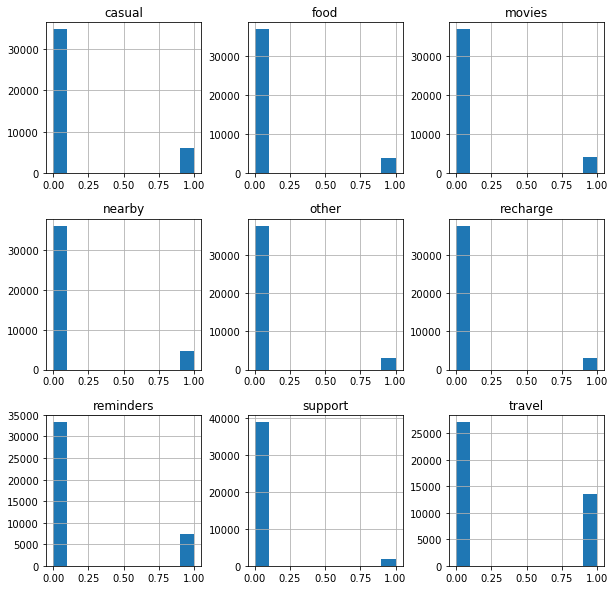

In [32]:
# Univariate plots to better understand each attribute.
y_train.hist(figsize = (10,10))
plt.show()

In [33]:
# # Multivariate plots to better understand the relationships between attributes.
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(y_train, figsize=(10,10))
# plt.show()

# Data Preprocessing

In [34]:
# Tokenization : process of chopping characters streams into tokens.
# A token is an instance of a character sequence in some particular document.
def tokenize(series):
    tokenizer = TreebankWordTokenizer()
    series = series.apply(lambda row: row.lower())
    series = series.apply(lambda row: tokenizer.tokenize(row))
    return series

In [35]:
X_train = tokenize(X_train)
X_test = tokenize(X_test)

In [36]:
X_train.head()

0                                      [7am, everyday]
1                                    [chocolate, cake]
2    [closed, mortice, and, tenon, joint, door, dim...
3                              [train, eppo, kelambum]
4    [yesterday, i, have, cancelled, the, flight, t...
Name: message, dtype: object

In [37]:
X_test.head()

0                            [nearest, metro, station]
1            [pick, up, n, drop, service, trough, cab]
2                         [i, wants, to, buy, a, bick]
3                                    [show, me, pizza]
4    [what, is, the, cheapest, package, to, andaman...
Name: message, dtype: object

In [38]:
# create English stop words list and apply it on the dataset.
def remove_stopwords(series):
    en_stop = get_stop_words('en')
    #print en_stop
    series = series.apply(lambda row : [i for i in row if i not in en_stop])
    return series

In [39]:
X_train = remove_stopwords(X_train)
X_test = remove_stopwords(X_test)

In [40]:
X_train.head()

0                                      [7am, everyday]
1                                    [chocolate, cake]
2    [closed, mortice, tenon, joint, door, dimentions]
3                              [train, eppo, kelambum]
4               [yesterday, cancelled, flight, ticket]
Name: message, dtype: object

In [41]:
X_test.head()

0                [nearest, metro, station]
1    [pick, n, drop, service, trough, cab]
2                       [wants, buy, bick]
3                            [show, pizza]
4    [cheapest, package, andaman, nicobar]
Name: message, dtype: object

In [42]:
# Stemming is the process of converting words to their root word.

def stemming(series):
    p_stemmer = PorterStemmer()
    series = series.apply(lambda row : [p_stemmer.stem(i) for i in row])
    return series

In [43]:
X_train = stemming(X_train)
X_test = stemming(X_test)

In [44]:
X_train.head()

0                                [7am, everyday]
1                                 [chocol, cake]
2    [close, mortic, tenon, joint, door, diment]
3                        [train, eppo, kelambum]
4            [yesterday, cancel, flight, ticket]
Name: message, dtype: object

In [45]:
X_test.head()

0               [nearest, metro, station]
1    [pick, n, drop, servic, trough, cab]
2                       [want, buy, bick]
3                           [show, pizza]
4    [cheapest, packag, andaman, nicobar]
Name: message, dtype: object

# Generating WordCloud

In [46]:
# Word clouds (also known as text clouds or tag clouds) work in a simple way: 
# the more a specific word appears in a source of textual data (such as a speech, blog post, or database),
# the bigger and bolder it appears in the word cloud.
def wordcloud(series):
    textall = " ".join([" ".join(i) for i in series.values])
    wordcloud = WordCloud(max_font_size=40).generate(textall)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

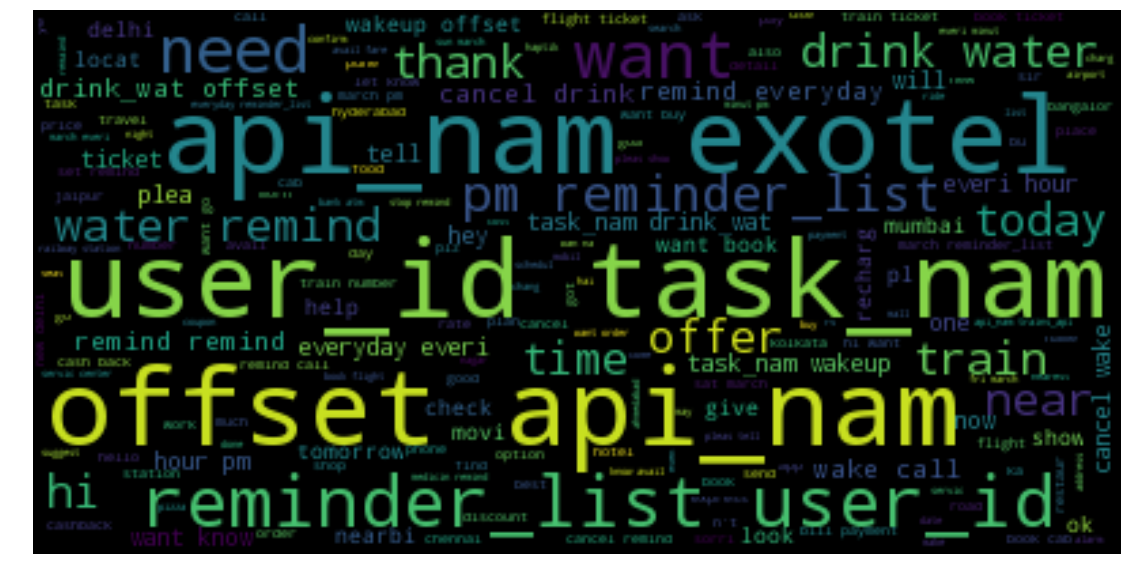

In [47]:
wordcloud(X_train)

# Creating a document-term matrix

In [48]:
# Convert a collection of text documents to a matrix of token counts.
# we will gather word frequencies (or term frequencies) associated with texts into
# a document-term matrix using the CountVectorizer class from the scikit-learn package.

# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, lowercase=False)
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=False, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [49]:
# learn the 'vocabulary' of the training data
X_train = vect.fit_transform(X_train.astype('U'))
X_test = vect.transform(X_test.astype('U'))

# examine the fitted vocabulary
#vect.get_feature_names()

In [50]:
X_train

<40659x20009 sparse matrix of type '<type 'numpy.int64'>'
	with 251387 stored elements in Compressed Sparse Row format>

In [51]:
X_test

<10000x20009 sparse matrix of type '<type 'numpy.int64'>'
	with 45467 stored elements in Compressed Sparse Row format>

# Evaluate Some Algorithms

In [36]:
# Spot Check Algorithms
models = []
models.append(('RF', RandomForestClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.645561 (0.080423)
CART: 0.645462 (0.078786)


# Select Best Model

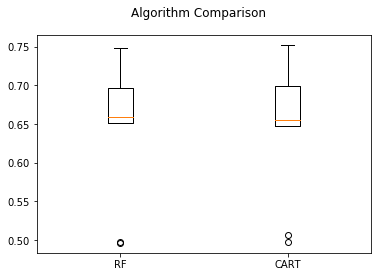

In [37]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Making Some Predictions

In [52]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200)


In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_pred))

0.6838


In [56]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.61      0.69       810
          1       0.75      0.67      0.71       450
          2       0.61      0.26      0.36       371
          3       0.87      0.84      0.85       893
          4       0.81      0.85      0.83      2138
          5       0.68      0.61      0.64       807
          6       0.73      0.61      0.67       637
          7       0.87      0.72      0.78      3282
          8       0.92      0.49      0.64      1668

avg / total       0.82      0.68      0.73     11056

